# Decision Tree
### Read the CSV
Author : Izzo Valentino

In [84]:
import pandas as pd

filepath = "../data/digester_data.csv"
dataset = pd.read_csv(filepath, index_col=0, parse_dates=True)
dataset.describe()


,Wash Filtrate to Digester - Total Flow,Wash Filtrate Vertical Nozzle,White Liquor Flow to ITC,H-factor,H-factor Co-Current,H-factor Target,H-factor Counter-Current,Volumetric Chip Flow,Chip Mass Flow from Piles,Spruce Saw Mill Chips Share,...,Hot Spent Digester Liquor Specific Flow to Impregnation Vessel,Digester Production,Digester Long Level,Digester Chip Level Control,Digester Dilution Factor,Digester Short Level,Blow Kappa,Blow Temperature,Blow Production,Weak Black Liquor to Evaporation Plant Residual Alkali
count,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,...,5968.000000,5.968000e+03,5968.000000,5.968000e+03,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000,5968.000000
mean,152.684728,136.377225,0.805236,570.977032,301.579641,570.424631,269.397390,648.486237,36.875105,8.321328,...,2.699426,1.131095e+03,88.548976,1.821106e+01,2.180605,48.323078,27.805850,87.668116,1192.618513,10.258447
std,16.048149,13.919758,0.065796,44.603387,23.764770,42.663694,23.083611,151.769241,4.564046,13.778885,...,0.024933,9.648935e+01,0.389135,1.198734e+01,0.077165,0.930924,1.542807,1.430514,110.261327,0.886624
min,74.308880,67.062810,0.247412,481.332200,238.832000,510.000000,218.241900,0.287224,0.000000,0.000000,...,1.557932,2.920000e-24,85.750780,8.270000e-44,0.562290,38.517540,22.170250,78.215330,617.716000,8.920000
25%,150.227000,134.500125,0.812160,533.705400,281.981575,530.000000,251.153225,657.000750,34.966920,0.000000,...,2.700000,1.159972e+03,88.269143,9.788168e+00,2.112270,47.825635,26.894120,86.934745,1173.334500,9.410000
50%,155.692000,139.346850,0.821603,559.434800,293.838550,550.000000,265.667550,690.155350,37.225650,0.000000,...,2.700000,1.164592e+03,88.548210,1.743239e+01,2.192728,48.213135,27.760630,87.685415,1214.454500,10.190000
75%,161.757025,143.924075,0.833718,609.275650,321.322500,600.000000,287.128975,711.669425,40.014853,14.973385,...,2.700000,1.165070e+03,88.808513,2.506831e+01,2.244194,48.771113,28.699717,88.671003,1251.014500,11.080000
max,190.484000,170.756900,0.912871,732.269400,376.860700,670.000000,364.774900,865.293400,48.994150,50.678790,...,2.800951,1.195267e+03,93.199450,1.015897e+02,2.727024,66.054000,33.682950,90.681490,1500.449000,11.370000


### Select the data

In [114]:
import numpy as np

y_data = dataset['Blow Kappa'].to_numpy()
X_data = dataset.to_numpy()
print(y_data.shape)
print(X_data.shape)

#BaseLine
y_data_B = np.full(
    shape=len(y_data),
    fill_value=np.mean(y_data),
    dtype=np.float64
)


(5968,)
(5968, 37)


### Split the data

In [115]:
y_train = y_data[:int(len(y_data)*0.8)]
y_test = y_data[int(len(y_data)*0.8):]

y_train_B = y_data_B[:int(len(y_data_B)*0.8)]
y_test_B = y_data_B[int(len(y_data_B)*0.8):]

X_train = X_data[:int(len(X_data)*0.8)]
X_test = X_data[int(len(X_data)*0.8):]

### Creation of the Decision Tree Regressor and train the model

In [94]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(max_depth=5,
                            splitter='random',
                            max_features='sqrt',
                            min_impurity_decrease=0.0,
                            min_samples_leaf=1,
                            min_samples_split=5,
                            random_state=0,
                            criterion='absolute_error')


In [92]:
param = {'max_depth': [3, 5, 10],
         'splitter': ['best', 'random'],
         'min_samples_split': [2, 5, 10],
         'min_samples_leaf': [1, 2, 3, 4, 5],
         'max_features': ['auto', 'sqrt', 'log2', None],
         'random_state': [0, 1, 2, 3, 4, 5],
         'min_impurity_decrease': [0.0, 0.1, 0.2, 0.3]}

grid = GridSearchCV(dtr, param, cv=2)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'max_depth': 5, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'random_state': 0, 'splitter': 'random'}


In [122]:
dtr.fit(X_train, y_train)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      max_features='sqrt', min_samples_split=5, random_state=0,
                      splitter='random')

### Display the prediction

In [123]:
import numpy as np

y_prediction = dtr.predict(X_test)
print("Result of the prediction : ", y_prediction)


Result of the prediction :  [27.33081 28.00311 28.43725 ... 26.84507 26.84507 26.84507]


### Control the Mean Absolute Error
Check the performence with the baseline

In [124]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_prediction)
mae_B = mean_absolute_error(y_train, y_train_B)

print("MAE:", mae)
print("MAE Baseline:", mae_B)


MAE: 1.1355963609715243
MAE Baseline: 1.1396043875364883


### Display the Descision Tree

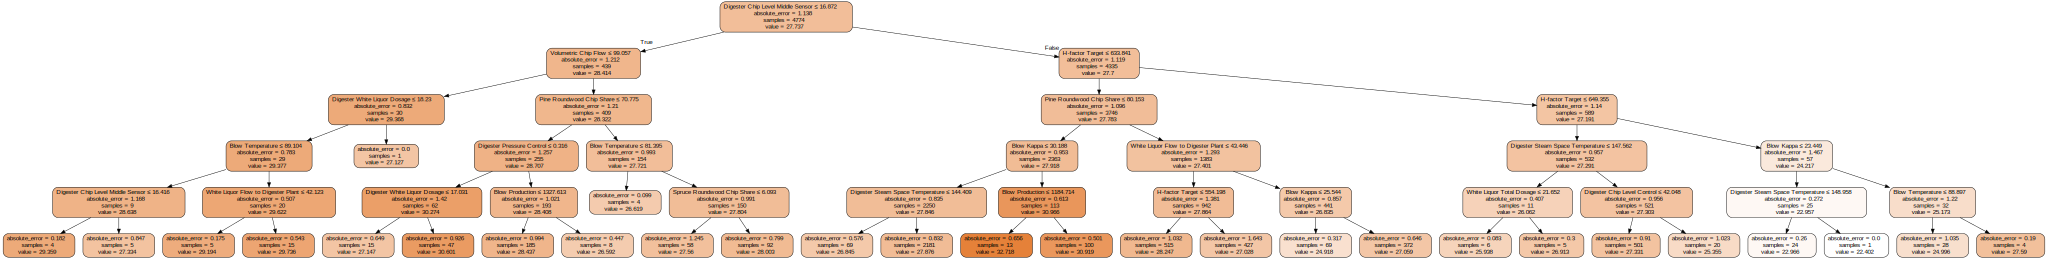

In [125]:
import graphviz
from sklearn import tree

def show_decision_tree(clf, data_feature_names, data_target_names, name=""):
    """
    This function visualize a decision tree
    From the exercice in Cyberlearn
    """
    dot_data = tree.export_graphviz(clf, out_file=None)
    graph = graphviz.Source(dot_data)
    graph.render(name)
    dot_data = tree.export_graphviz(clf,
                                    out_file=None,
                                    filled=True,
                                    feature_names=data_feature_names,
                                    class_names=data_target_names,
                                    rounded=True,
                                    special_characters=True)
    graph = graphviz.Source(dot_data)
    return graph


show_decision_tree(dtr,dataset.columns,'Blow Kappa',name="Blow Kappa")